In [1]:
import knn
import loadcifar10 as lc
import numpy as np
import matplotlib.pyplot as plt
import threading

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

lock = threading.Lock()

In [3]:
def cross_validate(root, l, k, results):
    accuracy = np.empty([5], dtype=np.float64)
    for i in range(1, 6):
        td, tl, vd, vl = lc.load_cifar_cross_validation(root, i)
        knn_o = knn.KNN()
        knn_o.train(td, tl)
        predictions = knn_o.predict(vd, k, l)
        num_correct = np.sum(predictions == vl)
        accuracy[i - 1] = num_correct / 10000
    with lock:
        results[k] = accuracy

In [4]:
def plot_data(l, res):
    for k, v in sorted(res.items()):
        plt.scatter([k] * len(v), v)
   
    mean = np.array([np.mean(v) for k, v in sorted(res.items())])
    std = np.array([np.std(v) for k, v in sorted(res.items())])
    plt.errorbar([k for k, v in sorted(res.items())], mean, yerr=std)
    plt.title('Cross-validation on %s and k' % (l, ))
    plt.xlabel('k')
    plt.ylabel('Cross-validation accuracy')
    plt.show()

In [5]:
def test_cross_validate(l):
    num_threads = 2
    threads = [None] * num_threads
    ks = [1, 3, 5, 7, 9, 10, 13, 17, 20, 50, 75, 100]
    root = 'cifar-10-batches-py'
    results = dict()
    for i in range(len(ks) // num_threads):
        for j in range(num_threads):
            threads[j] = threading.Thread(target=cross_validate, args=(root, l, ks[i * num_threads + j], results))
            threads[j].start()
        for j in range(num_threads):
            threads[j].join()
    plot_data(l, results)

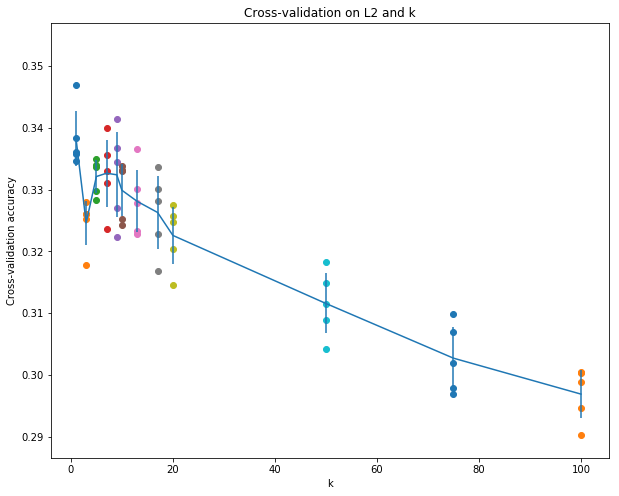

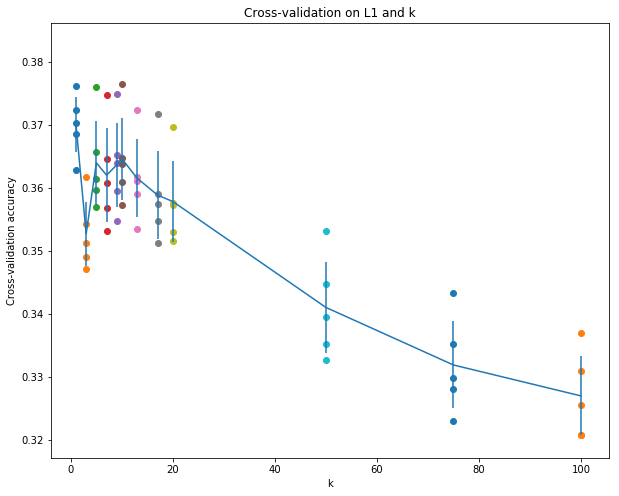

In [6]:
test_cross_validate('L2')
test_cross_validate('L1')